In [2]:
from sklearn.model_selection import train_test_split
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from fastai.text.all import *
from transformers import AutoTokenizer
import torch
import pandas as pd
from sklearn import preprocessing


In [3]:

df = pd.read_excel('Datos_noticias_fin_tot.xlsx')
learn_cls = ""


In [4]:

def load_model():
    encoder = preprocessing.LabelEncoder()
    # Y lo alimentamos con la información de las categorias
    encoder.fit(df["overall_sentiment"])

    df_class = pd.DataFrame(data = {
        "text": df["Noticia_preprocesado"],
        "ref": encoder.transform(df["overall_sentiment"])
        })
    
    model_name = "mrm8488/distilroberta-finetuned-financial-news-sentiment-analysis"
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    df_train, df_test = train_test_split(df_class, test_size=0.1, random_state=2023)
    data_cls = TextDataLoaders.from_df(df_train, valid_pct=0.2, text_col="text", label_col="ref", is_lm=False, tokenizer=tokenizer)
    learn_cls = text_classifier_learner(data_cls, AWD_LSTM, drop_mult=0.7, metrics=accuracy)
    
    learn_cls = learn_cls.load_encoder("ft_lm_distilroberta")
    suggested_lr = learn_cls.lr_find()
    learn_cls.fit_one_cycle(1, lr_max=suggested_lr.valley)
    learn_cls.unfreeze()
    learn_cls.fit_one_cycle(5, lr_max=slice(suggested_lr.valley/(2.6**4), suggested_lr.valley))


Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `n_workers` has to be changed to 0 to avoid getting stuck


epoch,train_loss,valid_loss,accuracy,time
0,0.740355,0.642154,0.713415,00:25


epoch,train_loss,valid_loss,accuracy,time
0,0.681546,0.602354,0.731707,00:52
1,0.661141,0.553813,0.731707,00:52
2,0.631914,0.511919,0.743902,00:52
3,0.610854,0.544355,0.743902,00:52
4,0.597574,0.528396,0.725610,00:52


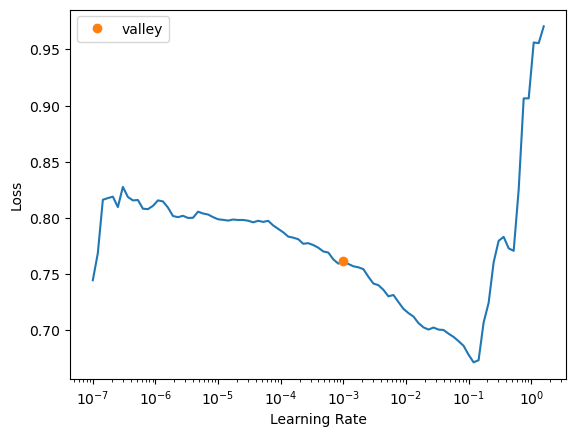

In [5]:
load_model()

In [ ]:
def get_resultado_noticias():
    texto_ejemplo = "Dogecoin prices surged to new highs amidst increased investor interest"

    # Definir un diccionario para mapear los números de clase a sus etiquetas
    clase_a_etiqueta = {0: "Negative", 1: "Positive"}

        
    # Obtener la predicción del clasificador de texto
    prediccion = learn_cls.predict(texto_ejemplo)

    # Obtener la etiqueta de la clase predicha utilizando el diccionario
    clase_predicha = clase_a_etiqueta[int(prediccion[0])]

    # Imprimir la clasificación obtenida
    print("Texto de ejemplo:", texto_ejemplo)
    print("Clasificación:", clase_predicha)